In [1]:
#import matplotlib dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# import additional dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

# View all of the classes that automap found

Base.classes.keys()




['measurement', 'station']

In [6]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station

In [7]:
# create inspector object and inspect the Measurement table

inspector = inspect(engine)
inspector.get_columns('measurement')
for i in inspector.get_columns('measurement'):
    print(i['name'], i['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# inspect the Station table
inspector.get_columns('station')
for i in inspector.get_columns('station'):
    print(i['name'], i['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#find out how many dates are in the data
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [11]:
#find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

one_year

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores

q = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year)

In [14]:
# create a dataframe from the query q
precip_df = pd.DataFrame(q, columns= ['date','precipitation'])

In [15]:
precip_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [16]:
#sort the data by date
precipitation = precip_df.sort_values('date')
precipitation.head(20)

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


In [17]:
# reset the index
precipitation.reset_index(drop=True, inplace=True)

In [18]:
precipitation.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15


ConversionError: Failed to convert value(s) to axis units: ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-192017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

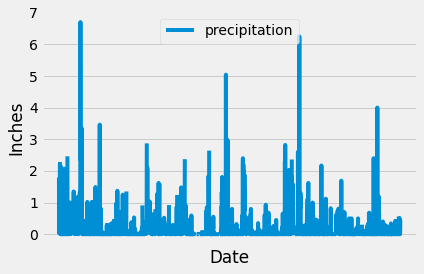

In [42]:
# plot the dataframe
precipitation.plot()
plt.ylabel('Inches')
plt.xlabel('Date')
xticks = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19'
         '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
plt.xticks([])


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [23]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [25]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [27]:
temps = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year)

temps_df = pd.DataFrame(temps, columns=['tobs'])

temps_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


Text(0.5, 0, 'Temperatures')

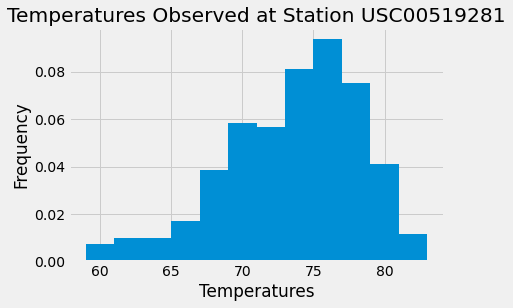

In [28]:
plt.hist(temps_df, density=True, bins=12)
plt.title('Temperatures Observed at Station USC00519281')
plt.ylabel('Frequency')
plt.xlabel('Temperatures')

# Close session

In [29]:
# Close Session
session.close()